```{figure} ../images/full-jtech-d-15-0020_1-f4.jpg
:width: 100%
:align: center
:name: fig-qvp-schematic
Quasy-Vertical Profile - QVP. 
Fuente: [Ryzhkov et al., 2016](https://doi.org/10.1175/JTECH-D-15-0020.1)

# Quasy-Vertical Profiles

---

## 🧭 Introducción

En este cuadernillo exploraremos el uso de **Perfiles Cuasi-Verticales (QVPs)** como una técnica eficiente para analizar la estructura vertical de la atmósfera utilizando datos de radar meteorológico polarimétrico. Mostraremos cómo generar y visualizar QVPs a partir de datos almacenados en formato Zarr mediante el flujo de trabajo **ARCO**, y compararemos su eficiencia frente al enfoque tradicional basado en archivos binarios.

## 📚 ¿Qué vas a aprender?

✔ Qué es un Perfil Cuasi-Vertical (QVP) y su utilidad en radar meteorológico polarimétrico  
✔ Cómo acceder a datos de radar preprocesados en formato Zarr con ARCO  
✔ Cómo calcular QVPs para distintas variables radar  
✔ Cómo comparar el flujo de trabajo ARCO con un enfoque tradicional basado en archivos binarios  
✔ Visualización de perfiles verticales de reflectividad, reflectividad diferencial, correlación cruzada y fase diferencial



## ✅ Requisitos Previos
```{list-table}
:header-rows: 1
* - Concepto
  - Importancia
  - Enlace sugerido
* - [Fundamentos de Python](../1.fundamentos/1.1.Fundamentos-python.ipynb)
  - Necesario
  - Fundamentos del lenguaje y estructuras básicas
* - [Xarray](../1.fundamentos/1.4.Introduccion-Xarray.ipynb)
  - Necesario
  - Manipulación de arreglos y datos multidimensionales
* - [Radar meteorológico](../1.fundamentos/1.5.Introduccion-Radar.ipynb)
  - Necesario
  - Conceptos básicos de adquisición y estructura de datos de radar
* - [Zarr y flujos de trabajo FAIR](https://zarr.dev/)
  - Útil
  - Concepto de almacenamiento en la nube y acceso eficiente a grandes volúmenes de datos
* - [Artículo sobre QVPs](https://doi.org/10.1175/JTECH-D-15-0020.1)
  - Útil
  - Fundamento teórico sobre Perfiles Cuasi-Verticales (Ryzhkov et al., 2016)

## 1. 📡 ¿Qué es un Perfil Cuasi-Vertical (QVP)?

Los **Perfiles Cuasi-Verticales** (_Quasi-Vertical Profiles_, QVPs) constituyen una **técnica** utilizada en el análisis de datos de radar meteorológico polarimétrico. Esta técnica consiste en **promediar la información de una elevación del radar (típicamente 20°) a lo largo de todos los azimuts** generar un perfil vertical simplificado, que permite representar la estructura vertical de la atmósfera en las cercanías del radar como se observa en la siguiente [figura](#fig-qvp)


```{figure} https://journals.ametsoc.org/view/journals/atot/33/3/images/full-jtech-d-15-0020_1-f2.jpg
:width: 50%
:align: center
:name: fig-qvp
Esquema conceptual de un perfil cuasi-vertical (QVP), donde se promedia azimutalmente una elevación específica del radar para construir un perfil vertical.  
Fuente: [Ryzhkov et al., 2016](https://doi.org/10.1175/JTECH-D-15-0020.1)



Los QVPs resultan útiles para:

- Estudiar la **evolución microfísica** de tormentas (como el crecimiento de cristales de hielo o procesos de fusión de hidrometeoros),
- Monitorear la **fase de precipitación**,
- Evaluar **transiciones entre fases líquidas y sólidas** en sistemas de precipitación.


## 2. 🗂️ Acceso a datos ARCO en formato Zarr

En esta sección accederemos a un conjunto de datos de radar meteorológico preprocesado, almacenado en formato **Zarr v3** en un bucket público mantenido por el proyecto **Pythia**.

Los datos corresponden al radar **KVNX (Vance AFB, Oklahoma)** para el evento del **20 de mayo de 2011**, y están disponibles gracias a la iniciativa **ARCO-FAIR**. Estos datos se encuentran almacenados de manera eficiente en la nube (Jetstream 2), lo que permite el acceso distribuido y escalable sin necesidad de descarga previa.


In [58]:
import xarray as xr
import xradar
import fsspec

# Ruta al archivo Zarr en la nube
url = "https://js2.jetstream-cloud.org:8001/"
path = "s3://pythia/radar/AtmosCol2025/KVNX.zarr"

# Abrimos nuesto dataset 
dtree = xr.open_datatree(
    path,
    engine="zarr",
    chunks={},
    backend_kwargs={
        "consolidated": False,
        "storage_options": {
            "anon": True,
            "client_kwargs": {
                "endpoint_url": url
            }
        }
    }
)

In [59]:
display(dtree)

<xarray.DataTree>
Group: /
└── Group: /VCP-12
    │   Dimensions:        (vcp_time: 40)
    │   Coordinates:
    │     * vcp_time       (vcp_time) datetime64[ns] 320B 2011-05-20T09:27:09 ... 201...
    │   Data variables:
    │       latitude       (vcp_time) float32 160B dask.array<chunksize=(1,), meta=np.ndarray>
    │       longitude      (vcp_time) float32 160B dask.array<chunksize=(1,), meta=np.ndarray>
    │       altitude       (vcp_time) float32 160B dask.array<chunksize=(1,), meta=np.ndarray>
    │       volume_number  (vcp_time) float64 320B dask.array<chunksize=(1,), meta=np.ndarray>
    │   Attributes:
    │       Conventions:      None
    │       instrument_name:  KVNX
    │       version:          None
    │       title:            None
    │       institution:      None
    │       references:       None
    │       source:           None
    │       history:          None
    │       comment:          im/exported using xradar
    │       scan_name:        VCP-12
    ├── Group: /VCP-12/georeferencing_correction
    │       Dimensions:    ()
    │       Coordinates:
    │           latitude   float64 8B ...
    │           altitude   int64 8B ...
    │           longitude  float64 8B ...
    ├── Group: /VCP-12/sweep_14
    │       Dimensions:            (vcp_time: 40, azimuth: 360, range: 460)
    │       Coordinates:
    │         * azimuth            (azimuth) float64 3kB 0.5 1.5 2.5 ... 357.5 358.5 359.5
    │           elevation          (azimuth) float64 3kB dask.array<chunksize=(180,), meta=np.ndarray>
    │         * range              (range) float32 2kB 2.125e+03 2.375e+03 ... 1.169e+05
    │           x                  (azimuth, range) float64 1MB dask.array<chunksize=(180, 230), meta=np.ndarray>
    │           time               (azimuth) datetime64[ns] 3kB dask.array<chunksize=(1,), meta=np.ndarray>
    │           y                  (azimuth, range) float64 1MB dask.array<chunksize=(180, 230), meta=np.ndarray>
    │           z                  (azimuth, range) float64 1MB dask.array<chunksize=(180, 230), meta=np.ndarray>
    │       Data variables:
    │           VRADH              (vcp_time, azimuth, range) float32 26MB dask.array<chunksize=(1, 180, 115), meta=np.ndarray>
    │           PHIDP              (vcp_time, azimuth, range) float32 26MB dask.array<chunksize=(1, 180, 115), meta=np.ndarray>
    │           WRADH              (vcp_time, azimuth, range) float32 26MB dask.array<chunksize=(1, 180, 115), meta=np.ndarray>
    │           DBZH               (vcp_time, azimuth, range) float32 26MB dask.array<chunksize=(1, 180, 115), meta=np.ndarray>
    │           ZDR                (vcp_time, azimuth, range) float32 26MB dask.array<chunksize=(1, 180, 115), meta=np.ndarray>
    │           RHOHV              (vcp_time, azimuth, range) float32 26MB dask.array<chunksize=(1, 180, 115), meta=np.ndarray>
    │           sweep_fixed_angle  (vcp_time) float32 160B dask.array<chunksize=(1,), meta=np.ndarray>
    │           sweep_number       (vcp_time) float32 160B dask.array<chunksize=(1,), meta=np.ndarray>
    ├── Group: /VCP-12/sweep_13
    │       Dimensions:            (vcp_time: 40, azimuth: 360, range: 500)
    │       Coordinates:
    │         * azimuth            (azimuth) float64 3kB 0.5 1.5 2.5 ... 357.5 358.5 359.5
    │           elevation          (azimuth) float64 3kB dask.array<chunksize=(180,), meta=np.ndarray>
    │         * range              (range) float32 2kB 2.125e+03 2.375e+03 ... 1.269e+05
    │           time               (azimuth) datetime64[ns] 3kB dask.array<chunksize=(1,), meta=np.ndarray>
    │           y                  (azimuth, range) float64 1MB dask.array<chunksize=(180, 250), meta=np.ndarray>
    │           x                  (azimuth, range) float64 1MB dask.array<chunksize=(180, 250), meta=np.ndarray>
    │           z                  (azimuth, range) float64 1MB dask.array<chunksize=(180, 250), meta=np.ndarray>
    │       Data variables:
    │           

In [44]:
print(f"Tamaño del conjunto de datos es: {dtree.nbytes / 1024**3: .2f} GB")

Tamaño del conjunto de datos es:  6.99 GB


```{note}
Este dataset se encuentra almacenado en el bucket:  
`s3://pythia/radar/AtmosCol2025/KVNX.zarr`  
y se accede a través del servicio Jetstream 2 de la Universidad de Indiana, compatible con la interfaz S3.

## 2.1 🗂️ Exploración del DataTree

Una vez cargado el dataset en formato `DataTree`, podemos inspeccionar su estructura jerárquica. Esta estructura refleja la organización típica de un archivo de radar con múltiples elevaciones (*sweeps*), metadatos globales y parámetros del radar.

Podemos listar los nodos hijos principales del árbol de datos:



In [3]:
list(dtree.children)

['VCP-12']

Luego podemos explorar los niveles inferiores, por ejemplo:

In [4]:
# Exploramos los hijos del volumen VCP-12
list(dtree["VCP-12"].children)

['georeferencing_correction',
 'sweep_13',
 'sweep_15',
 'sweep_16',
 'sweep_2',
 'sweep_10',
 'sweep_14',
 'radar_parameters',
 'sweep_11',
 'sweep_3',
 'sweep_0',
 'sweep_4',
 'sweep_12',
 'sweep_1',
 'sweep_5',
 'sweep_6',
 'sweep_8',
 'sweep_9',
 'sweep_7']

Cada `sweep_N` representa un barrido del radar a un ángulo de elevación distinto. Además, encontramos nodos como `radar_parameters` y `georeferencing_correction`.

:::{note}
La nomenclatura `sweep_0`, `sweep_1`, ..., `sweep_16` representa los diferentes ángulos de elevación en el volumen de escaneo. El número más alto generalmente corresponde a los ángulos más altos, ideales para QVPs.
:::

También es posible inspeccionar directamente una variable meteorológica, como la reflectividad horizontal (`DBZH`) en un sweep específico:


### 2.2 📁 Acceso a nodos con sintaxis de ruta (`file-path syntax`)

Una ventaja del uso de `xarray-datatree` es que permite acceder a cualquier nodo o variable utilizando rutas tipo archivo, lo que simplifica el manejo jerárquico de los datos.

Seleccionaremos la variable `DBZH` desde el nodo correspondiente utilizando la sintaxis tipo archivo:


In [10]:
# Forma recomendada
dbzh = dtree["/VCP-12/sweep_16/DBZH"]

In [11]:
display(dbzh)

<xarray.DataArray 'DBZH' (vcp_time: 40, azimuth: 360, range: 460)> Size: 26MB
dask.array<open_dataset-DBZH, shape=(40, 360, 460), dtype=float32, chunksize=(1, 180, 115), chunktype=numpy.ndarray>
Coordinates:
  * vcp_time   (vcp_time) datetime64[ns] 320B 2011-05-20T09:27:09 ... 2011-05...
  * azimuth    (azimuth) float64 3kB 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
    elevation  (azimuth) float64 3kB dask.array<chunksize=(180,), meta=np.ndarray>
  * range      (range) float32 2kB 2.125e+03 2.375e+03 ... 1.166e+05 1.169e+05
    time       (azimuth) datetime64[ns] 3kB dask.array<chunksize=(1,), meta=np.ndarray>
    x          (azimuth, range) float64 1MB dask.array<chunksize=(180, 230), meta=np.ndarray>
    z          (azimuth, range) float64 1MB dask.array<chunksize=(180, 230), meta=np.ndarray>
    y          (azimuth, range) float64 1MB dask.array<chunksize=(180, 230), meta=np.ndarray>
Attributes:
    standard_name:  radar_equivalent_reflectivity_factor_h
    long_name:      Equivalent reflectivity factor H
    units:          dBZ

:::{hint}
También es posible acceder a la misma variable usando:

```python
dtree["VCP-12"]["sweep_16"].DBZH
dtree["VCP-12"]["sweep_16"]["DBZH"]

## 3. ⚙️ Cálculo de Perfiles Cuasi-Verticales (QVPs)

Una vez explorada la estructura de datos, procedemos a calcular los Perfiles Cuasi-Verticales (QVPs). Este tipo de perfil se genera promediando una variable de radar a lo largo de todos los azimuts en un barrido de elevación fijo, lo que proporciona una vista simplificada pero útil de la estructura vertical de la atmósfera.

### 3.1. 📥 Selección del sweep y del período de interés

Trabajaremos con el `sweep_16`, correspondiente a un ángulo de elevación bajo, adecuado para QVPs. Además, seleccionamos un intervalo de tiempo entre **10:00 y 12:00 UTC del 20 de mayo de 2011**, con el objetivo de reproducir los resultados presentados en **Ryzhkov et al. (2016)**, quienes analizaron un sistema convectivo de mesoescala (MCS) observado con el radar KVNX en esa misma fecha.



In [17]:
ds_qvp = dtree["/VCP-12/sweep_16"].ds.sel(
    vcp_time=slice("2011-05-20 10:00", "2011-05-20 12:00")
)

:::{note}
Según Ryzhkov et al. (2016), el evento del 20 de mayo de 2011 fue un MCS observado en el norte de Oklahoma por el radar KVNX..
:::

### 3.2 🧮 Función para calcular un QVP

Una vez seleccionados los datos del barrido adecuado, definimos una función que calcule el Perfil Cuasi-Vertical (QVP) a partir de cualquier variable radar que siga el esquema tridimensional típico (`vcp_time`, `azimuth`, `range`).

La función realiza el promedio azimutal y, si la variable está en escala logarítmica (como `dBZ`), realiza la conversión a escala lineal antes del promedio y luego la convierte nuevamente a logarítmica. También transforma la dimensión `range` a `height` (en km) usando el ángulo de elevación medio.


In [22]:
import numpy as np


def compute_qvp(ds: xr.Dataset, var="DBZH") -> xr.DataArray:
    """
    Calcula un QVP (Perfil Cuasi-Vertical) para una variable específica del radar.

    Parámetros:
    ----------
    ds : xr.Dataset
        Dataset que contiene la variable radar.
    var : str
        Nombre de la variable a procesar (ej. 'DBZH', 'ZDR', 'RHOHV', 'PHIDP').

    Retorna:
    --------
    xr.DataArray
        QVP con coordenadas [vcp_time, height] y atributos preservados.
    """
    units = ds[var].attrs.get("units", "")

    # Conversión de logarítmico a lineal si es necesario
    if units.startswith("dB"):
        qvp = 10 ** (ds[var] / 10)
        qvp = qvp.mean("azimuth", skipna=True)
        qvp = 10 * np.log10(qvp)
    else:
        qvp = ds[var].mean("azimuth", skipna=True)

    # Conversión de distancia a altura estimada (en km)
    elev_rad = ds.sweep_fixed_angle.mean(skipna=True).values * np.pi / 180.0
    qvp = qvp.assign_coords({
        "range": (qvp.range.values * np.sin(elev_rad)) / 1000  # convierte a km
    })

    qvp = qvp.rename(f"qvp_{var}")
    qvp = qvp.rename({"range": "height"})
    return qvp

:::{tip}
Esta función es reutilizable para múltiples variables polarimétricas (DBZH, ZDR, RHOHV, PHIDP). Asegúrate de que la variable tenga dimensiones azimuth y range, y que el atributo units esté definido correctamente.
:::

:::{warning}
Si el atributo units no está definido o no comienza con "dB", se asumirá que la variable está en escala lineal. Revisa los metadatos antes de aplicar la función.
:::

### 3.3 🔄 Cálculo de QVPs para múltiples variables

Una vez definida la función `compute_qvp()`, procedemos a aplicarla a las principales variables polarimétricas del radar: `DBZH`, `ZDR`, `RHOHV` y `PHIDP`.

Estas variables ofrecen información complementaria sobre la estructura microfísica de la atmósfera:

- `DBZH`: Reflectividad horizontal, relacionada con la intensidad de la precipitación.
- `ZDR`: Reflectividad diferencial, útil para distinguir tipos de hidrometeoros.
- `RHOHV`: Coeficiente de correlación cruzada, indica homogeneidad de las partículas.
- `PHIDP`: Fase diferencial, relacionada con el contenido de agua líquida.


In [19]:
%%time
qvp_ref = compute_qvp(ds_qvp, var="DBZH").compute()
qvp_zdr = compute_qvp(ds_qvp, var="ZDR").compute()
qvp_rhohv = compute_qvp(ds_qvp, var="RHOHV").compute()
qvp_phidp = compute_qvp(ds_qvp, var="PHIDP").compute()

CPU times: user 3.56 s, sys: 152 ms, total: 3.72 s
Wall time: 11.9 s


:::{note}
Usamos .compute() para forzar la ejecución de los cálculos en memoria. Esto es necesario porque los objetos cargados con xarray y Dask son evaluados de forma perezosa (lazy evaluation).
:::

## 📈 4. Visualización de Perfiles Cuasi-Verticales (QVPs)

### 4.1. 🖼️ Función para graficar QVPs en panel 2×2

Definimos una función para visualizar los Perfiles Cuasi-Verticales (QVPs) de las variables más comunes en radar polarimétrico. Esto facilita la comparación entre distintos métodos (Zarr vs binario) o eventos meteorológicos.


In [30]:
import matplotlib.pyplot as plt
import cmweather


def plot_qvp_panels(qvp_ref, qvp_zdr, qvp_rhohv, qvp_phidp):
    """
    Visualiza perfiles cuasi-verticales (QVPs) en un panel 2x2 con formato científico completo.

    Parámetros:
    -----------
    qvp_ref : xr.DataArray
        Reflectividad (DBZH)
    qvp_zdr : xr.DataArray
        Reflectividad diferencial (ZDR)
    qvp_rhohv : xr.DataArray
        Coeficiente de correlación cruzada (RHOHV)
    qvp_phidp : xr.DataArray
        Fase diferencial (PHIDP)
    title : str
        Título de la figura
    """
    fig, axs = plt.subplots(2, 2, figsize=(12, 6), sharex=True, sharey=True)

    # Panel 1: Reflectividad (DBZH)
    cf = qvp_ref.plot.contourf(
        x="vcp_time", y="height", cmap="ChaseSpectral",
        levels=np.arange(-10, 55, 1), ax=axs[0][0], add_colorbar=False
    )
    contour = qvp_ref.plot.contour(
        x="vcp_time", y="height", levels=np.arange(-10, 50, 10),
        colors="k", ax=axs[0][0]
    )
    axs[0][0].clabel(contour, fmt="%d", inline=True, fontsize=8)
    axs[0][0].set_title(r"$Z$")
    axs[0][0].set_ylabel(r"$Height \ [km]$")
    axs[0][0].set_ylim(0, 7)
    plt.colorbar(cf, ax=axs[0][0], label=r"$Reflectivity \ [dBZ]$")

    # Panel 2: Reflectividad diferencial (ZDR)
    cf1 = qvp_zdr.plot.contourf(
        x="vcp_time", y="height", cmap="ChaseSpectral",
        levels=np.linspace(-1, 5, 11), ax=axs[0][1], add_colorbar=False
    )
    contour = qvp_ref.plot.contour(
        x="vcp_time", y="height", levels=np.arange(-10, 50, 10),
        colors="k", ax=axs[0][1]
    )
    axs[0][1].clabel(contour, fmt="%d", inline=True, fontsize=8)
    axs[0][1].set_title(r"$Z_{DR}$")
    axs[0][1].set_ylabel("")
    axs[0][1].set_xlabel("")
    plt.colorbar(cf1, ax=axs[0][1], label=r"$Diff. \ Reflectivity \ [dB]$")

    # Panel 3: RHOHV
    cf2 = qvp_rhohv.plot.contourf(
        x="vcp_time", y="height", cmap="Carbone11",
        levels=np.arange(0.8, 1.01, 0.01), ax=axs[1][0], add_colorbar=False
    )
    contour = qvp_ref.plot.contour(
        x="vcp_time", y="height", levels=np.arange(-10, 50, 10),
        colors="k", ax=axs[1][0]
    )
    axs[1][0].clabel(contour, fmt="%d", inline=True, fontsize=8)
    axs[1][0].set_title(r"$\rho _{HV}$")
    axs[1][0].set_ylabel(r"$Height \ [km]$")
    axs[1][0].set_xlabel(r"$Time \ [UTC]$")
    plt.colorbar(cf2, ax=axs[1][0], label=r"$Cross-Correlation \ Coef.$")

    # Panel 4: PHIDP
    cf3 = qvp_phidp.plot.contourf(
        x="vcp_time", y="height", cmap="PD17",
        levels=np.arange(0, 110, 5), ax=axs[1][1], add_colorbar=False
    )
    contour = qvp_ref.plot.contour(
        x="vcp_time", y="height", levels=np.arange(-10, 50, 10),
        colors="k", ax=axs[1][1]
    )
    axs[1][1].clabel(contour, fmt="%d", inline=True, fontsize=8)
    axs[1][1].set_title(r"$\theta _{DP}$")
    axs[1][1].set_xlabel(r"$Time \ [UTC]$")
    axs[1][1].set_ylabel("")
    plt.colorbar(cf3, ax=axs[1][1], label=r"$Differential \ Phase \ [deg]$")

    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

### 4.2 📊 Visualización de QVPs usando función reutilizable

Ahora utilizamos la función `plot_qvp_panels()` para graficar los Perfiles Cuasi-Verticales (QVPs) de las variables `DBZH`, `ZDR`, `RHOHV` y `PHIDP`, obtenidos a partir de los datos del radar KVNX para el evento del 20 de mayo de 2011.


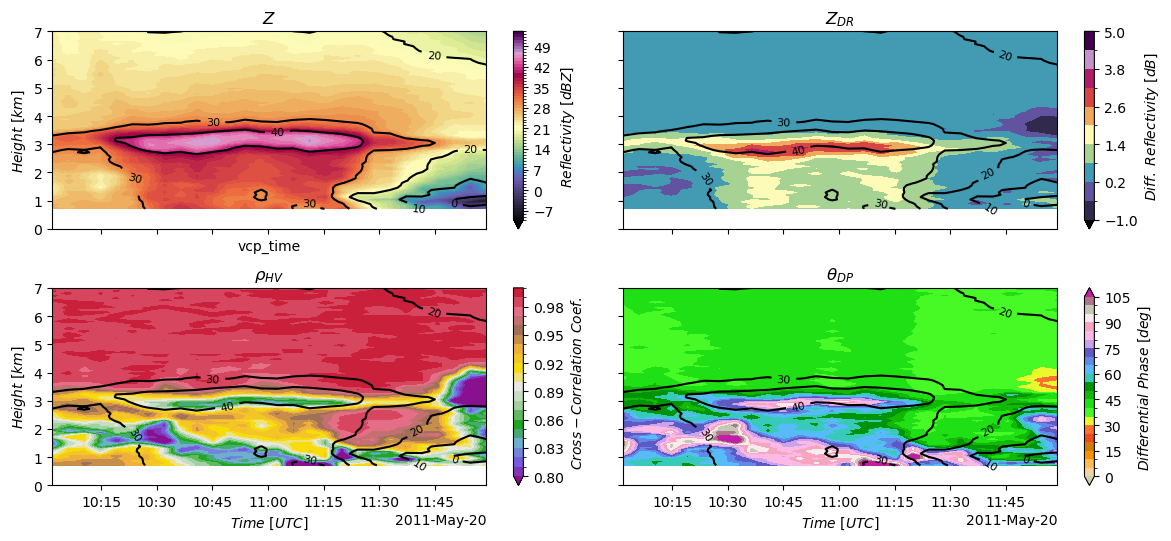

CPU times: user 1.36 s, sys: 33 ms, total: 1.39 s
Wall time: 1.39 s


In [31]:
%%time
plot_qvp_panels(
    qvp_ref=qvp_ref,
    qvp_zdr=qvp_zdr,
    qvp_rhohv=qvp_rhohv,
    qvp_phidp=qvp_phidp,
)

El flujo completo —desde el acceso a datos remotos hasta el cálculo y visualización de los QVPs— se realiza de forma muy eficiente gracias al formato Zarr y la compatibilidad con lectura directa vía `fsspec`.

- **Cálculo de QVPs:** ~11.9 segundos
- **Visualización completa (panel 2×2):** ~1.4 segundos

:::{admonition} ⏱️ Tiempo total aproximado
**13.3 segundos** para acceder, procesar y visualizar datos tridimensionales de radar polarimétrico directamente desde almacenamiento en la nube.
:::

:::{note}
Esta eficiencia es posible gracias al uso del formato **FAIR-compliant Zarr v3**, procesamiento lazy con **Dask**, y el acceso remoto vía **fsspec** sin necesidad de descarga local.
:::

## 5. ⏱️ Comparación con flujo de trabajo tradicional

En esta sección contrastamos el enfoque moderno y reproducible basado en datos ARCO-Zarr con el flujo tradicional que utiliza archivos binarios NEXRAD. Este último requiere:

- Acceso manual a archivos `.gz` desde AWS S3
- Descompresión local
- Conversión a `xarray.Dataset` con `xradar`
- Concatenación secuencial o paralela

### 5.1 📥 Descarga y apertura de archivos NEXRAD

Usamos `fsspec` para acceder directamente al bucket público de NEXRAD en AWS, seguido por descompresión con `gzip`. Creamos la siguente función para descargar los archivos de manera local:


In [36]:
import fsspec
import tempfile
import os
import xradar
import gzip

def nexrad_download(file):
    local_file = fsspec.open_local(
        f"simplecache::s3://{file}",
        s3={"anon": True},
        filecache={"cache_storage": "."},
    )
    with gzip.open(local_file, "rb") as gz:
        with tempfile.NamedTemporaryFile(delete=False) as temp_file:
            temp_file.write(gz.read())
            temp_file_path = temp_file.name

    try:
        data_tree = xradar.io.open_nexradlevel2_datatree(temp_file_path)
    finally:
        os.remove(local_file)
        os.remove(temp_file_path)
    return data_tree

### 5.2 🧪 Creación del dataset QVP

Seleccionamos 35 archivos del radar `KVNX` correspondientes al evento del **20 de mayo de 2011 entre 10:00 y 12:00 UTC**. Cada archivo contiene un volumen escaneado; extraemos el `sweep_16`.


In [45]:
import pandas as pd


fs = fsspec.filesystem("s3", anon=True)
radar = "KVNX"
bucket = "s3://noaa-nexrad-level2/"
query = f"2011/05/20/{radar}/{radar}"

files = [f"s3://{f}" for f in sorted(fs.glob(f"{bucket}{query}*"))][135:170]

In [46]:
len(files)

35

Después de identificar los archivos, procedemos a descargarlos, descomprimirlos y extraer el barrido `sweep_16` de cada volumen. Luego concatenamos todos los datasets a lo largo del eje `vcp_time`.

In [47]:
%%time
datasets = []
times = []

for f in files:
    dtree = nexrad_download(f)
    times.append(pd.to_datetime(dtree.time_coverage_start.item()))
    datasets.append(dtree["sweep_16"].to_dataset())

ds_trad_qvp = xr.concat(datasets, dim="vcp_time")
ds_trad_qvp = ds_trad_qvp.assign_coords(
    vcp_time=[t.tz_convert(None) if t.tzinfo else t for t in times]
)

CPU times: user 52.1 s, sys: 3.99 s, total: 56.1 s
Wall time: 2min 20s


:::{note}
Cada archivo descargado contiene un volumen escaneado completo. Al concatenar los sweep_16, reconstruimos una secuencia temporal continua entre 10:00 y 12:00 UTC.
:::

:::{warning}
Este proceso secuencial puede tardar más de 1 minuto debido a la descarga, descompresión y apertura de múltiples archivos binarios.
:::

### 5.3 🔄 Cálculo de QVPs

Una vez creado el dataset concatenado a partir de los archivos binarios, utilizamos la función `compute_qvp()` para generar los Perfiles Cuasi-Verticales (QVPs) de las principales variables polarimétricas del radar.


In [49]:
%%time
qvp_trad_ref = compute_qvp(ds_trad_qvp, var="DBZH")
qvp_trad_zdr = compute_qvp(ds_trad_qvp, var="ZDR")
qvp_trad_rhohv = compute_qvp(ds_trad_qvp, var="RHOHV")
qvp_trad_phidp = compute_qvp(ds_trad_qvp, var="PHIDP")

CPU times: user 1.36 s, sys: 234 ms, total: 1.59 s
Wall time: 1.59 s


:::{note}
Al igual que en el flujo ARCO-Zarr, el cálculo se realiza promediando la variable sobre el azimut, y transformando range a height en kilómetros.
:::

### 5.4 📊 Visualización de QVPs tradicionales

Para visualizar los QVPs generados desde archivos binarios NEXRAD, reutilizamos la misma función utilizada anteriormente:


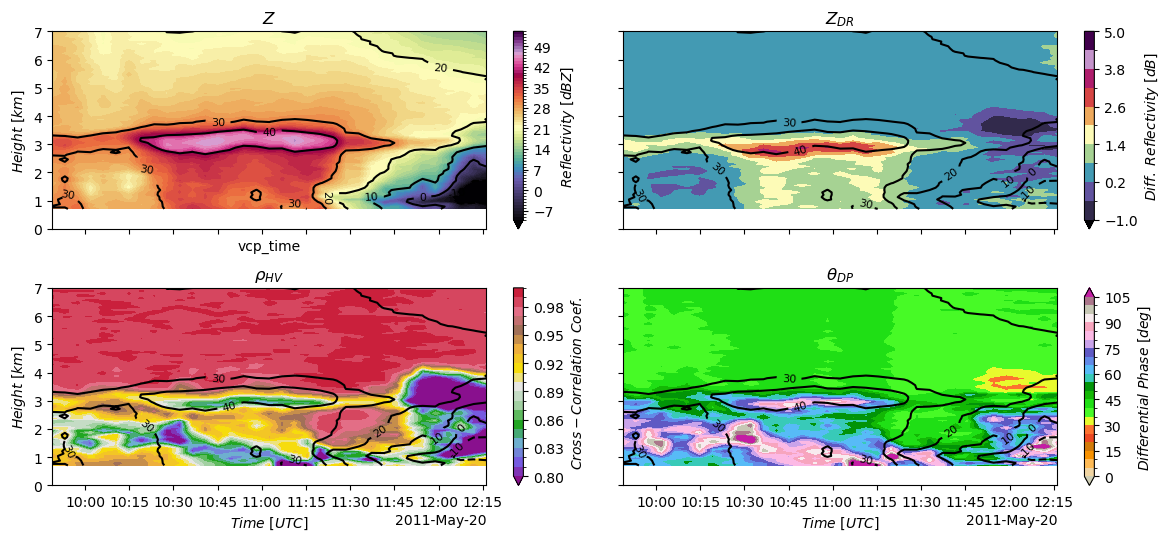

In [50]:
plot_qvp_panels(
    qvp_ref=qvp_trad_ref,
    qvp_zdr=qvp_trad_zdr,
    qvp_rhohv=qvp_trad_rhohv,
    qvp_phidp=qvp_trad_phidp,
)

El flujo tradicional para procesar y visualizar QVPs con archivos binarios NEXRAD implica una carga computacional y operativa significativamente mayor:

- **Descarga y lectura secuencial de archivos**: ~2 minutos 20 segundos  
- **Cálculo de QVPs**: ~1.6 segundos  
- **Visualización**: ~1.4 segundos

:::{admonition} ⏱️ Tiempo total aproximado
~2 minutos 23 segundos para descargar, procesar y visualizar datos desde archivos binarios.
:::

:::{warning}
Este flujo tradicional duplica los datos en disco durante la descompresión de archivos .gz, lo que implica mayor uso de almacenamiento local, especialmente crítico en entornos en la nube o en notebooks compartidos.
:::

:::{tip}
El enfoque tradicional no escala bien ni se alinea con los principios FAIR.
:::

## 📝 Conclusiones

En este cuaderno comparamos dos enfoques para el cálculo de Perfiles Cuasi-Verticales (QVPs) a partir de datos de radar polarimétrico:

1. 🌀 **Flujo tradicional** usando archivos binarios NEXRAD (`.gz`)
2. 🧊 **Flujo moderno FAIR** usando datos preprocesados en formato Zarr (ARCO)

La siguiente tabla resume los tiempos aproximados y la aceleración lograda en cada etapa:

```{list-table}
:header-rows: 1
:widths: 25 20 20 20
* - Etapa
  - ARCO-Zarr
  - Binario NEXRAD
  - Aceleración (×)
* - Acceso / lectura de datos
  - ~0 s (lazy loading)
  - ~140 s
  - ~140×
* - Cálculo de QVPs
  - ~11.9 s
  - ~1.6 s
  - 0.13×
* - Visualización
  - ~1.4 s
  - ~1.4 s
  - = 
* - **Total estimado**
  - **~13.3 s**
  - **~143.0 s**
  - **~10.7×**


:::{admonition} 🏆 Ventajas del enfoque ARCO-Zarr

- Acceso remoto eficiente con fsspec (sin necesidad de descarga)
- Formato FAIR: Findable, Accessible, Interoperable, Reusable
- Procesamiento lazy optimizado con Dask
- Reproducibilidad garantizada gracias al preprocesamiento estandarizado
:::

:::{warning}
El flujo tradicional requiere múltiples pasos manuales (descarga, descompresión, limpieza de archivos temporales) y duplica los datos localmente, lo que lo vuelve menos escalable y más propenso a errores.
:::

:::{tip}
Para aplicaciones educativas, colaborativas o en la nube, el enfoque FAIR con datos Zarr es altamente recomendable por su eficiencia, portabilidad y facilidad de uso.
:::